In [170]:
# Read the housing data CSV file

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

housing_stat=pd.read_csv("Resource/BC_cities Housing_data.csv.csv")
housing_stat.head(10)

,REF_DATE,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,223,units,0,v1344408890,343.1.1.1.1.1,5870.0,NaN,NaN,NaN,0
1,2019,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,223,units,0,v1344408890,343.1.1.1.1.1,5590.0,A,NaN,NaN,0
2,2018,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,81,units,0,v1344408893,343.1.1.1.1.2,60000.0,NaN,NaN,NaN,0
3,2019,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,81,units,0,v1344408893,343.1.1.1.1.2,65000.0,A,NaN,NaN,0
4,2018,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average family total income,Dollars,81,units,0,v1344408895,343.1.1.1.1.4,115000.0,NaN,NaN,NaN,0
5,2019,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average family total income,Dollars,81,units,0,v1344408895,343.1.1.1.1.4,120000.0,A,NaN,NaN,0
6,2018,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average sale price,Dollars,81,units,0,v1344408897,343.1.1.1.1.6,630000.0,NaN,NaN,NaN,0
7,2019,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average sale price,Dollars,81,units,0,v1344408897,343.1.1.1.1.6,610000.0,A,NaN,NaN,0
8,2018,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average buyer age,Years,308,units,0,v1344408891,343.1.1.1.1.10,46.0,NaN,NaN,NaN,0
9,2019,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average buyer age,Years,308,units,0,v1344408891,343.1.1.1.1.10,46.0,A,NaN,NaN,0


In [171]:
# Remove unnecessary text from the 'GEO' column


housing_stat['GEO'] = housing_stat['GEO'].str.replace(r'- Mission, Census metropolitan area \(CMA\)', '', regex=True)
housing_stat['GEO'] = housing_stat['GEO'].str.replace(r'Census metropolitan area \(CMA\)', '', regex=True)
housing_stat['GEO'] = housing_stat['GEO'].str.replace(r'Census agglomeration \(CA\)', '', regex=True)



In [172]:
# Create a clean copy of the housing data

clean_data=pd.DataFrame(housing_stat)

clean_data= housing_stat.drop(["UOM_ID","SCALAR_FACTOR", "SCALAR_ID", "STATUS", "SYMBOL", "TERMINATED"], axis=1)







In [173]:
# Remove rows with missing values in the 'VALUE' column


clean_data2=clean_data.dropna(subset=["VALUE"])
clean_data2.head(10)

,REF_DATE,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,VECTOR,COORDINATE,VALUE,DECIMALS
0,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,v1344408890,343.1.1.1.1.1,5870.0,0
1,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,v1344408890,343.1.1.1.1.1,5590.0,0
2,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,v1344408893,343.1.1.1.1.2,60000.0,0
3,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,v1344408893,343.1.1.1.1.2,65000.0,0
4,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average family total income,Dollars,v1344408895,343.1.1.1.1.4,115000.0,0
5,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average family total income,Dollars,v1344408895,343.1.1.1.1.4,120000.0,0
6,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average sale price,Dollars,v1344408897,343.1.1.1.1.6,630000.0,0
7,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average sale price,Dollars,v1344408897,343.1.1.1.1.6,610000.0,0
8,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average buyer age,Years,v1344408891,343.1.1.1.1.10,46.0,0
9,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average buyer age,Years,v1344408891,343.1.1.1.1.10,46.0,0


In [174]:
clean_data2["VALUE"].isnull().value_counts()

False    191978
Name: VALUE, dtype: int64

In [175]:
# Filter the data based on gender

gender= ["Male", "Female"]
gender_df= clean_data2[clean_data2["Buyer characteristics"].isin(gender)]
gender_df

,REF_DATE,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,VECTOR,COORDINATE,VALUE,DECIMALS
10,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Male,Number of property buyers,Number,v1344408901,343.1.1.1.2.1,3005.0,0
11,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Male,Number of property buyers,Number,v1344408901,343.1.1.1.2.1,2880.0,0
12,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Male,Average total income of property buyer,Dollars,v1344408904,343.1.1.1.2.2,75000.0,0
13,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Male,Average total income of property buyer,Dollars,v1344408904,343.1.1.1.2.2,80000.0,0
14,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Male,Average family total income,Dollars,v1344408906,343.1.1.1.2.4,120000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284925,2019,Outside of census metropolitan areas (CMAs) an...,NaN,Buyer in a group of three or more,55 years old and over,Not first-time home buyer,Female,Average family total income,Dollars,v1344629379,487.4.4.3.3.4,170000.0,0
284926,2018,Outside of census metropolitan areas (CMAs) an...,NaN,Buyer in a group of three or more,55 years old and over,Not first-time home buyer,Female,Average sale price,Dollars,v1344629381,487.4.4.3.3.6,310000.0,0
284927,2019,Outside of census metropolitan areas (CMAs) an...,NaN,Buyer in a group of three or more,55 years old and over,Not first-time home buyer,Female,Average sale price,Dollars,v1344629381,487.4.4.3.3.6,460000.0,0
284928,2018,Outside of census metropolitan areas (CMAs) an...,NaN,Buyer in a group of three or more,55 years old and over,Not first-time home buyer,Female,Average buyer age,Years,v1344629375,487.4.4.3.3.10,65.0,0


In [176]:
# Filter the data for average sales vs gender

average_sales_vs_gender=gender_df.loc[gender_df["Estimates"]== "Average sale price"]
average_sales_vs_gender.head()

,REF_DATE,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,VECTOR,COORDINATE,VALUE,DECIMALS
16,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Male,Average sale price,Dollars,v1344408908,343.1.1.1.2.6,630000.0,0
17,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Male,Average sale price,Dollars,v1344408908,343.1.1.1.2.6,620000.0,0
26,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Female,Average sale price,Dollars,v1344408919,343.1.1.1.3.6,620000.0,0
27,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Female,Average sale price,Dollars,v1344408919,343.1.1.1.3.6,610000.0,0
236,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups",First-time home buyer,Male,Average sale price,Dollars,v1344409150,343.1.1.2.2.6,520000.0,0


In [177]:
average_sales_vs_gender["REF_DATE"].value_counts()

2018    2085
2019    2042
Name: REF_DATE, dtype: int64

In [178]:
# Extract necessary columns for analysis

Average_Sale_Price= average_sales_vs_gender["VALUE"]
Gender=average_sales_vs_gender["Buyer characteristics"]
Cities= average_sales_vs_gender["GEO"]
Year= average_sales_vs_gender["REF_DATE"]


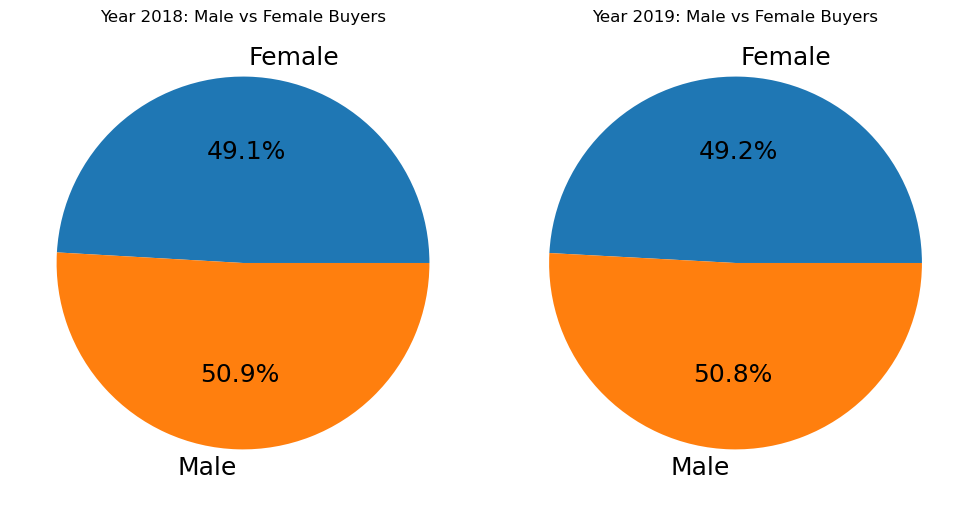

In [179]:
# Create a DataFrame for price vs gender

Price_vs_Gender = pd.DataFrame({
    "Year": Year,
    "Cities": Cities,
    "Gender": Gender,
    "Average_Sale_Price": Average_Sale_Price
})

# Create a figure with two subplots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for Year 2018
year_2018_data = Price_vs_Gender[Price_vs_Gender["Year"] == 2018]
year_2018_sales = year_2018_data.groupby("Gender")["Average_Sale_Price"].sum()
year_2018_sales_percentage = year_2018_sales / year_2018_sales.sum()

ax1.pie(year_2018_sales_percentage, labels=year_2018_sales_percentage.index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax1.set_title("Year 2018: Male vs Female Buyers")

# Pie chart for Year 2019
year_2019_data = Price_vs_Gender[Price_vs_Gender["Year"] == 2019]
year_2019_sales = year_2019_data.groupby("Gender")["Average_Sale_Price"].sum()
year_2019_sales_percentage = year_2019_sales / year_2019_sales.sum()

ax2.pie(year_2019_sales_percentage, labels=year_2019_sales_percentage.index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax2.set_title("Year 2019: Male vs Female Buyers")

plt.tight_layout()
plt.show()

In [180]:
# Filter the data for income vs price analysis

Income_Vs_Price = clean_data2.loc[
   (clean_data2["Number of buyers as part of a property sale"]=="Total, all number of buyers categories")&
   (clean_data2["Age groups"]=="Total, all age groups")&
   (clean_data2["First-time home buyer status"]=="Total, all home buyers categories") &
   (clean_data2["Buyer characteristics"]=="Total, all admission categories")]

# Extract specific data for the year 2018
average_sale_price2018= Income_Vs_Price.loc[(Income_Vs_Price["Estimates"]=="Average sale price") &(Income_Vs_Price["REF_DATE"]==2018)]["VALUE"]

income2018= Income_Vs_Price.loc[(Income_Vs_Price["Estimates"]=="Average total income of property buyer")&(Income_Vs_Price["REF_DATE"]==2018)]["VALUE"]

number_of_buyers2018=Income_Vs_Price.loc[(Income_Vs_Price["Estimates"]=="Number of property buyers")&(Income_Vs_Price["REF_DATE"]==2018)]["VALUE"]

# Extract specific data for the year 2018
average_sale_price2019= Income_Vs_Price.loc[(Income_Vs_Price["Estimates"]=="Average sale price") &(Income_Vs_Price["REF_DATE"]==2019)]["VALUE"]

income2019= Income_Vs_Price.loc[(Income_Vs_Price["Estimates"]=="Average total income of property buyer")&(Income_Vs_Price["REF_DATE"]==2019)]["VALUE"]

number_of_buyers2019=Income_Vs_Price.loc[(Income_Vs_Price["Estimates"]=="Number of property buyers")&(Income_Vs_Price["REF_DATE"]==2019)]["VALUE"]






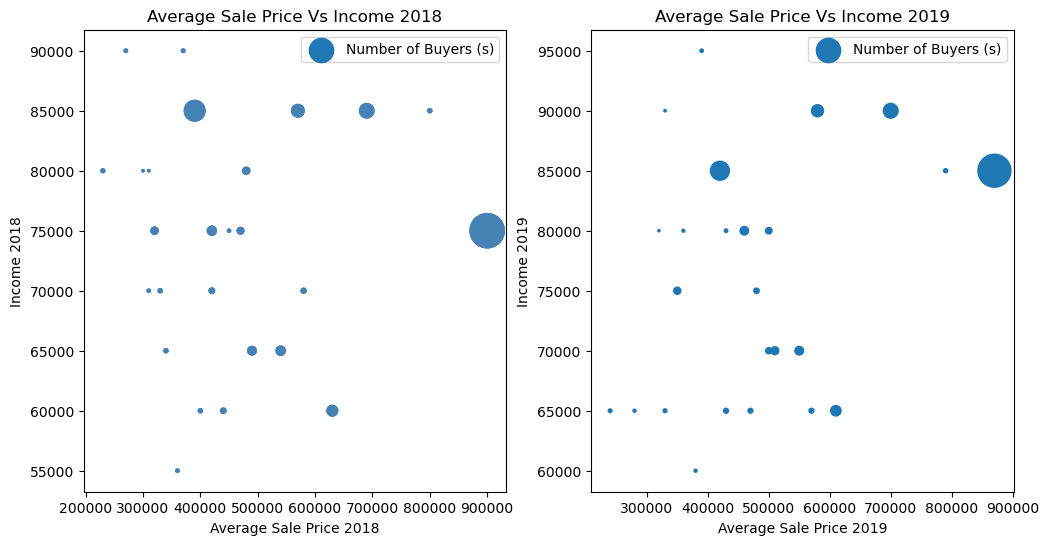

In [181]:
# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot 1
scatter = axes[0].scatter(average_sale_price2018, income2018, s=number_of_buyers2018/100, label='Number of Buyers (s)')

axes[0].scatter(average_sale_price2018, income2018, color="steelblue", s=number_of_buyers2018/100)
axes[0].set_title("Average Sale Price Vs Income 2018")
axes[0].set_xlabel("Average Sale Price 2018")
axes[0].set_ylabel("Income 2018")
axes[0].legend(handles=[scatter], loc='upper right')


# Scatter plot 2
axes[1].scatter(average_sale_price2019, income2019, s=number_of_buyers2019/100)
axes[1].set_title("Average Sale Price Vs Income 2019")
axes[1].set_xlabel("Average Sale Price 2019")
axes[1].set_ylabel("Income 2019")
axes[1].legend(handles=[scatter], loc='upper right')


# Display the plots
plt.show()

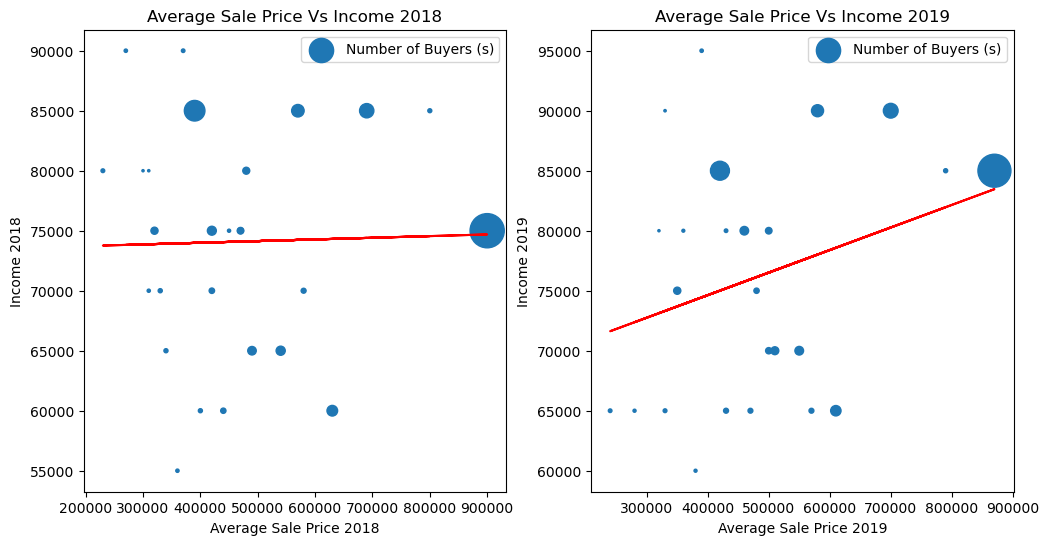

R-value: 0.023020987575531428
R-value: 0.2858381002528095


In [182]:
# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot 1
axes[0].scatter(average_sale_price2018, income2018, s=number_of_buyers2018/100)
axes[0].set_title("Average Sale Price Vs Income 2018")
axes[0].set_xlabel("Average Sale Price 2018")
axes[0].set_ylabel("Income 2018")

# Calculate and plot regression line for scatter plot 1
slope, intercept, r_value1, p_value, std_err = linregress(average_sale_price2018, income2018)
regression_line = slope * np.array(average_sale_price2018) + intercept
axes[0].plot(average_sale_price2018, regression_line, color='red', label='Regression Line')
axes[0].legend(handles=[scatter], loc='upper right')


# Scatter plot 2
axes[1].scatter(average_sale_price2019, income2019, s=number_of_buyers2019/100)
axes[1].set_title("Average Sale Price Vs Income 2019")
axes[1].set_xlabel("Average Sale Price 2019")
axes[1].set_ylabel("Income 2019")


# Calculate and plot regression line for scatter plot 2
slope, intercept, r_value2, p_value, std_err = linregress(average_sale_price2019, income2019)
regression_line = slope * np.array(average_sale_price2019) + intercept
axes[1].plot(average_sale_price2019, regression_line, color='red', label='Regression Line')
axes[1].legend(handles=[scatter], loc='upper right')


# Display the plots
plt.show()
print("R-value:", r_value1)
print("R-value:", r_value2)
